In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:18<00:00, 20.4MB/s]
100% 346M/346M [00:18<00:00, 20.1MB/s]


In [3]:
# Define paths to your directories
train_dir = '/content/seg_train/seg_train'
val_dir = '/content/seg_test/seg_test'

# Create the training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [11]:
# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Create validation dataset
val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Add `.repeat()` to prevent running out of data
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [12]:
# Load the pre-trained ResNet50 model without top layers (ImageNet weights)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input shape if needed

# Freeze all the layers in the base model initially
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential([
    base_model,  # Add the pre-trained ResNet50 model
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Adjust output layer for your dataset's number of classes (6 classes)
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
    metrics=['accuracy']
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
# Fine-tuning: Unfreeze the last few layers of the base model for training
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Retrain the model with the fine-tuned layers
history = model.fit(
    train_generator,
    epochs=20,  # Increase the number of epochs to give the model time to learn
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=test_generator.samples // 32
)

NameError: name 'train_generator' is not defined

In [4]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the pre-trained ResNet50 model without the top layers (ImageNet weights)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the custom model on top of ResNet50
model = models.Sequential([
    base_model,  # ResNet50 base model
    layers.Flatten(),  # Flatten the output from the base model
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Fully connected layer with L2 regularization
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Another fully connected layer with L2 regularization
    layers.Dropout(0.5),  # Another dropout layer
    layers.Dense(6, activation='softmax')  # Output layer for 6 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Since it's multi-class classification
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Use a learning rate suitable for the new layers
    metrics=['accuracy']  # Track accuracy metric
)

# # Print the model summary
# model.summary()

# Directory paths for training and testing data
train_dir = '/content/seg_train/seg_train'
test_dir = '/content/seg_test/seg_test'

# Load the training and testing data using image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Adjust image size to match ResNet50 input
    batch_size=32,
    label_mode='categorical',  # Multi-class classification
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [5]:
# Train the model with the base model layers frozen
history = model.fit(
    train_dataset,
    epochs=10,  # Train for a few epochs
    validation_data=test_dataset
)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 74s 131ms/step - accuracy: 0.6673 - loss: 1.8476 - val_accuracy: 0.9000 - val_loss: 0.8904
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.8324 - loss: 1.1270 - val_accuracy: 0.9053 - val_loss: 0.8559
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.8675 - loss: 0.9889 - val_accuracy: 0.9143 - val_loss: 0.7773
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.8963 - loss: 0.8619 - val_accuracy: 0.9153 - val_loss: 0.7650
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.9132 - loss: 0.7599 - val_accuracy: 0.9127 - val_loss: 0.7458
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.9167 - loss: 0.7278 - val_accuracy: 0.9127 - val_loss: 0.7355
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.9323 - loss: 0.6489 - val_accuracy: 0.9180 - val_loss: 0.7248
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.9339 - loss: 0

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9095 - loss: 0.7306
Test Accuracy: 91.60%


In [8]:
import matplotlib.pyplot as plt

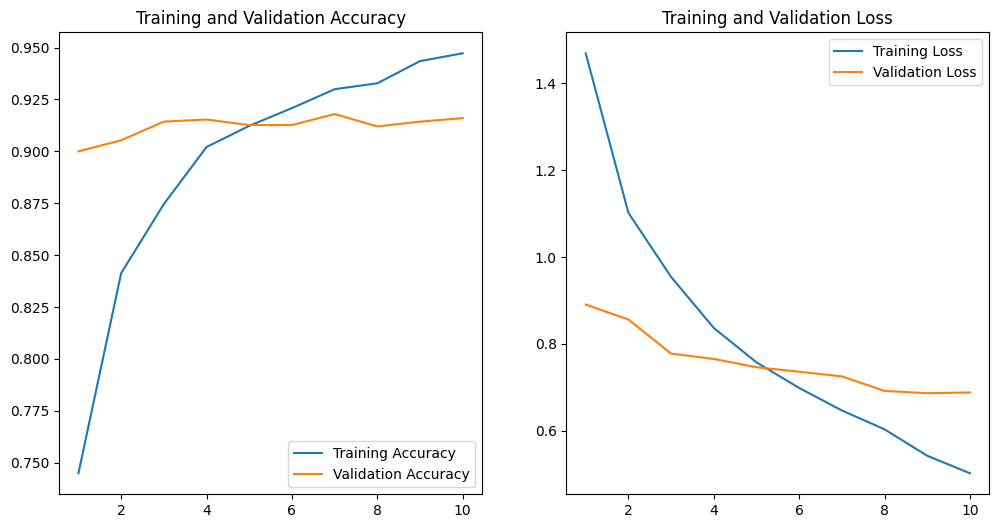

In [9]:
# Plotting accuracy and loss over epochs

# Retrieve accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()

Doing again with 20 epoch

In [10]:
history = model.fit(
    train_dataset,
    epochs=20,  # Increase this to 20 or more
    validation_data=test_dataset
)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - accuracy: 0.9468 - loss: 0.5010 - val_accuracy: 0.9183 - val_loss: 0.7053
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.9463 - loss: 0.4721 - val_accuracy: 0.9210 - val_loss: 0.6300
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.9583 - loss: 0.4155 - val_accuracy: 0.9147 - val_loss: 0.6581
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 115ms/step - accuracy: 0.9552 - loss: 0.4231 - val_accuracy: 0.9190 - val_loss: 0.6179
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.9612 - loss: 0.3926 - val_accuracy: 0.9190 - val_loss: 0.6308
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.9641 - loss: 0.3690 - val_accuracy: 0.9227 - val_loss: 0.5568
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.9618 - loss: 0.3490 - val_accuracy: 0.9137 - val_loss: 0.5794
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.9623 - loss: 0

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9133 - loss: 0.6043
Test Accuracy: 91.77%


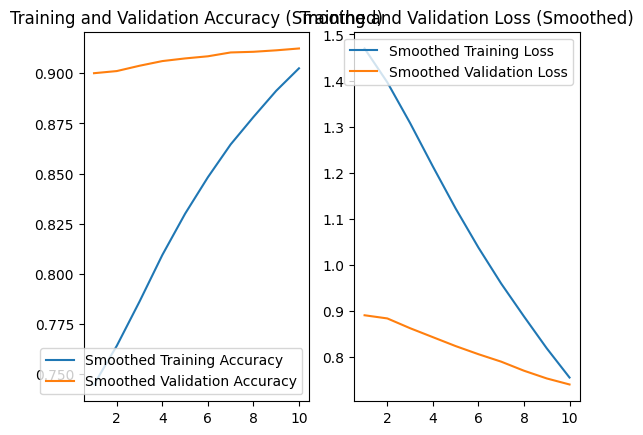

In [11]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Smooth the accuracy and loss values before plotting
smooth_train_acc = smooth_curve(train_acc)
smooth_val_acc = smooth_curve(val_acc)
smooth_train_loss = smooth_curve(train_loss)
smooth_val_loss = smooth_curve(val_loss)

# Plot smoothed accuracy and loss curves
plt.subplot(1, 2, 1)
plt.plot(epochs_range, smooth_train_acc, label='Smoothed Training Accuracy')
plt.plot(epochs_range, smooth_val_acc, label='Smoothed Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Smoothed)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, smooth_train_loss, label='Smoothed Training Loss')
plt.plot(epochs_range, smooth_val_loss, label='Smoothed Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Smoothed)')

plt.show()

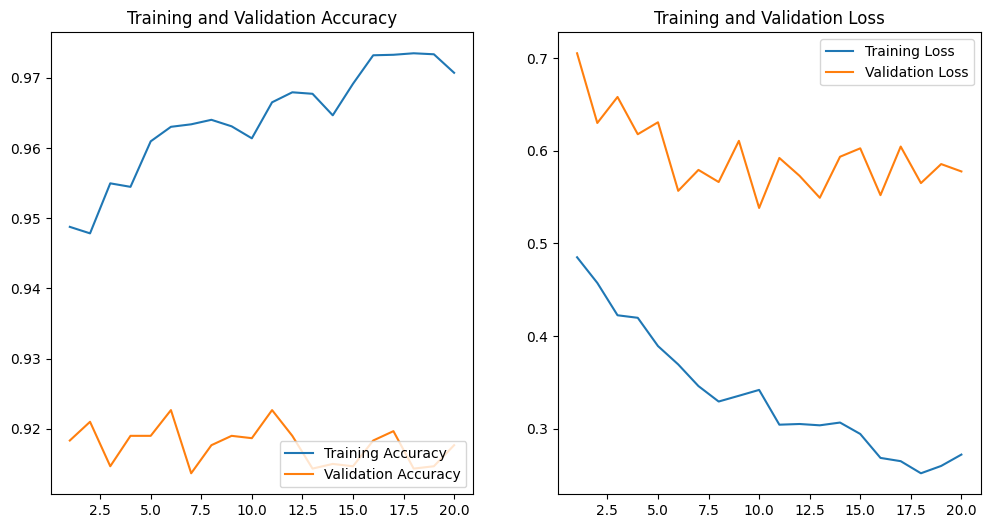

In [13]:
# Plotting accuracy and loss over epochs

# Retrieve accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()